In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_confusion_matrix
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Dataset/

Mounted at /content/drive
/content/drive/My Drive/Dataset


In [ ]:
dataset = pd.read_csv("BBC News Train.csv")
dataset.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [ ]:
dataset.shape

(1490, 3)

**Count Values of Categories**

In [ ]:
dataset['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [ ]:
# Associate Category names with numerical index and save it in new column CategoryId
target_category = dataset['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


In [ ]:
dataset['CategoryId'] = dataset['Category'].factorize()[0]
# dataset.head()

In [ ]:
# Create a new pandas dataframe "category", which only has unique Categories, also sorting this list in order of CategoryId values
category = dataset[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,Category,CategoryId
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


**Visualizing Data**

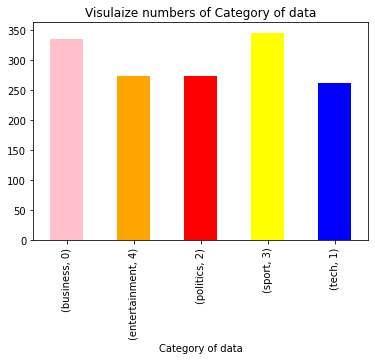

In [ ]:
dataset.groupby('Category').CategoryId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

**WorldCloud of Category Related Words**

In [ ]:
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

business = dataset[dataset['CategoryId'] == 0]

business = business['Text']

tech = dataset[dataset['CategoryId'] == 1]

tech = tech['Text']

politics = dataset[dataset['CategoryId'] == 2]

politics = politics['Text']

sport = dataset[dataset['CategoryId'] == 3]

sport = sport['Text']

entertainment = dataset[dataset['CategoryId'] == 4]

entertainment = entertainment['Text']

def wordcloud_draw(dataset, color = 'white'):

  words = ' '.join(dataset)

  cleaned_word = ' '.join([word for word in words.split()

  if (word != 'news' and word != 'text')])

  wordcloud = WordCloud(stopwords = stop,

  background_color = color,

  width = 2500, height = 2500).generate(cleaned_word)

  plt.figure(1, figsize = (10,7))

  plt.imshow(wordcloud)

  plt.axis("off")

  plt.show()



WorldCloud for Business

business related words:


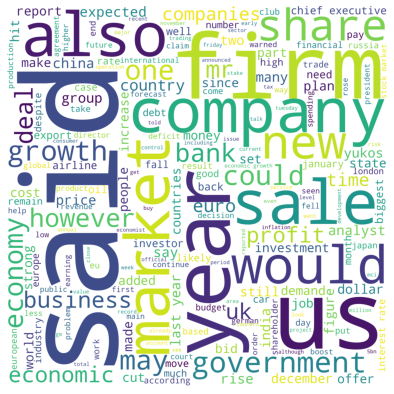

In [ ]:
print("business related words:")
wordcloud_draw(business, 'white')

WorldCloud for Tech

tech related words:


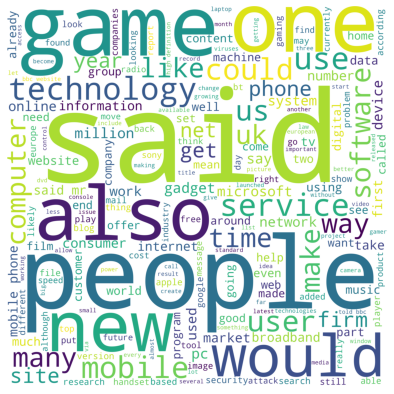

In [ ]:
print("tech related words:")
wordcloud_draw(tech, 'white')

WorldCloud for Politics

politics related words:


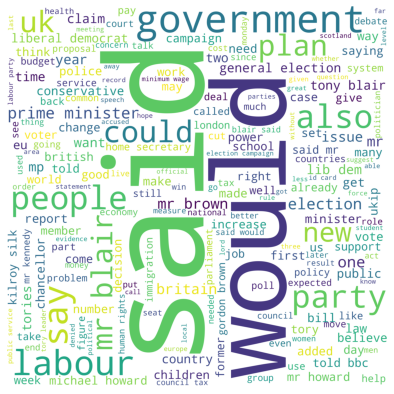

In [ ]:
print("politics related words:")
wordcloud_draw(politics, 'white')

WorldCloud for Sport

sport related words:


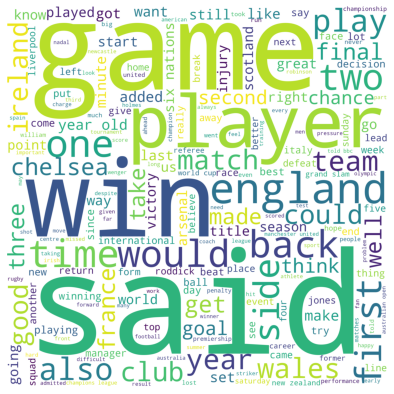

In [ ]:
print("sport related words:")
wordcloud_draw(sport, 'white')

WorldCloud for Entertainment

entertainment related words:


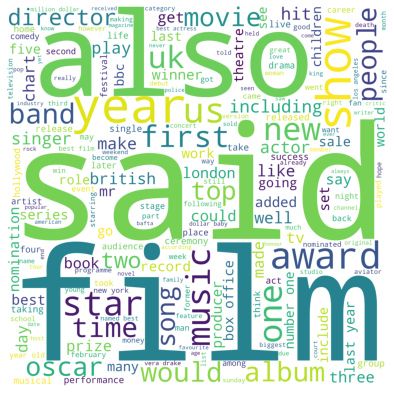

In [ ]:
print("entertainment related words:")
wordcloud_draw(entertainment, 'white')

In [ ]:
text = dataset["Text"]
text.head(10)

0    worldcom ex-boss launches defence lawyers defe...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens in ...
3    lifestyle  governs mobile choice  faster  bett...
4    enron bosses in $168m payout eighteen former e...
5    howard  truanted to play snooker  conservative...
6    wales silent on grand slam talk rhys williams ...
7    french honour for director parker british film...
8    car giant hit by mercedes slump a slump in pro...
9    fockers fuel festive film chart comedy meet th...
Name: Text, dtype: object

In [ ]:
category = dataset['Category']
category.head(10)

0         business
1         business
2         business
3             tech
4         business
5         politics
6            sport
7    entertainment
8         business
9    entertainment
Name: Category, dtype: object

**Remove All Tags**

In [ ]:
def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', text)
dataset['Text'] = dataset['Text'].apply(remove_tags)

**Remove Special Characters**

In [ ]:
def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
dataset['Text'] = dataset['Text'].apply(special_char)

**Convert into Lower Case**

In [ ]:
def convert_lower(text):
   return text.lower()
dataset['Text'] = dataset['Text'].apply(convert_lower)
dataset['Text'][1]

'german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy   munich based research institute ifo said that its confidence index fell to 95 5 in february from 97 5 in january  its first decline in three months  the study found that the outlook in both the manufacturing and retail sectors had worsened  observers had been hoping that a more confident business sector would signal that economic activity was picking up    we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner   the main reason is probably that the domestic economy is still weak  particularly in the retail trade   economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline   he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue   germany s economy grew 1 

**Remove all Stopwords**

In [ ]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]
dataset['Text'] = dataset['Text'].apply(remove_stopwords)
# dataset['Text'][1]

**Lemmatizing the Words**

In [ ]:
nltk.download('omw-1.4')
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
dataset['Text'] = dataset['Text'].apply(lemmatize_word)
dataset['Text'][1]

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


'german business confidence slide german business confidence fell february knocking hope speedy recovery europe largest economy munich based research institute ifo said confidence index fell 95 5 february 97 5 january first decline three month study found outlook manufacturing retail sector worsened observer hoping confident business sector would signal economic activity picking surprised ifo index taken knock said dz bank economist bernd weidensteiner main reason probably domestic economy still weak particularly retail trade economy labour minister wolfgang clement called dip february ifo confidence figure mild decline said despite retreat index remained relatively high level expected modest economic upswing continue germany economy grew 1 6 last year shrinking 2003 however economy contracted 0 2 last three month 2004 mainly due reluctance consumer spend latest indication growth still proving elusive ifo president han werner sinn said improvement german domestic demand sluggish export

Dataset after Cleaning Text

In [ ]:
dataset

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex bos launch defence lawyer defendin...,business,0
1,154,german business confidence slide german busine...,business,0
2,1101,bbc poll indicates economic gloom citizen majo...,business,0
3,1976,lifestyle governs mobile choice faster better ...,tech,1
4,917,enron boss 168m payout eighteen former enron d...,business,0
...,...,...,...,...
1485,857,double eviction big brother model caprice holb...,entertainment,4
1486,325,dj double act revamp chart show dj duo jk joel...,entertainment,4
1487,1590,weak dollar hit reuters revenue medium group r...,business,0
1488,1587,apple ipod family expands market apple expande...,tech,1


**Declared Dependent and Independent Value**

In [ ]:
x = dataset['Text']
y = dataset['CategoryId']

**Create and Fit Bag of Words Model**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.CategoryId.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dataset.Text).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)
print(x)

X.shape =  (1490, 5000)
y.shape =  (1490,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


**Split Dataset into Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

1043
447


In [ ]:
yt=pd.DataFrame(y_train)
yt.value_counts()

3    249
0    233
2    193
1    184
4    184
dtype: int64

In [ ]:
yt=pd.DataFrame(y_test)
yt.value_counts()

0    103
3     97
4     89
2     81
1     77
dtype: int64

**Predict using Multinomial Naive Bayes**

In [ ]:
mdl = MultinomialNB(alpha=1.0,fit_prior=True)

oneVsRest = OneVsRestClassifier(mdl)
MultinomialNB_model=oneVsRest.fit(x_train, y_train)
oneVsRest.fit(x_train, y_train)

y_pred_train = oneVsRest.predict(x_train)
y_pred_test = oneVsRest.predict(x_test)

# Performance metrics

train_accuracy = round(accuracy_score(y_train, y_pred_train) * 100, 2)
test_accuracy = round(accuracy_score(y_test, y_pred_test) * 100, 2)

train_precision, train_recall, train_f1, train_support = score(y_train, y_pred_train, average='micro')
test_precision, test_recall, test_f1, test_support = score(y_test, y_pred_test, average='micro')

print("Traning Performace")
print("Accuracy: ",train_accuracy)
print("Precision: ",round(train_precision*100,2))
print("Recall: ",round(train_recall*100,2))
print("F1 Score: ",round(train_f1*100,2))
print('----------------------------------')
print('----------------------------------')
print("Testing Performace")
print("Accuracy: ",test_accuracy)
print("Precision: ",round(test_precision*100,2))
print("Recall: ",round(test_recall*100,2))
print("F1 Score: ",round(test_f1*100,2))


Traning Performace
Accuracy:  98.85
Precision:  98.85
Recall:  98.85
F1 Score:  98.85
----------------------------------
----------------------------------
Testing Performace
Accuracy:  97.09
Precision:  97.09
Recall:  97.09
F1 Score:  97.09


# Predict News Article

In [ ]:
classifier = MultinomialNB(alpha=1.0,fit_prior=True).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)

In [ ]:
y_pred1 = cv.transform(['Hour ago, I contemplated retirement for a lot of reasons. I felt like people were not sensitive enough to my injuries. I felt like a lot of people were backed, why not me? I have done no less. I have won a lot of games for the team, and I am not feeling backed, said Ashwin'])
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
  result = "Business News"
elif yy == [1]:
  result = "Tech News"
elif yy == [2]:
  result = "Politics News"
elif yy == [3]:
  result = "Sports News"
elif yy == [4]:
  result = "Entertainment News"
print(result)

Sports News
